In [14]:
import requests
import pandas as pd

def retrieveHistoricaldata(code):
    try:
        url = 'https://www.analizy.pl/api/quotation/fio/'+code
        r = requests.get(url)
        df = pd.DataFrame(r.json()['series'][0]['price'])
    except:
        df = 0
    return df

In [15]:
df = retrieveHistoricaldata("ALL86")
df.to_csv("stocks.csv")

In [16]:
df =  df.rename(columns={"date": "Date", "value" : "Adj Close"})
df["asset"] = "ALL86"
df["Adj Close"] = 1000 * df["Adj Close"] / df["Adj Close"].max()

df["Date"] = pd.to_datetime(df["Date"])

ALL86 = df

In [17]:
import plotly.express as px

#%matplotlib Qt5Agg

template = "plotly_dark"

fig = px.line(df, x='Date', y="Adj Close", template=template)

fig.update_layout(
    title={
        'text': "ALL86",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date, timedelta

In [19]:
thing = yf.Ticker("SPY") # 
hist = thing.history(period="max").reset_index()

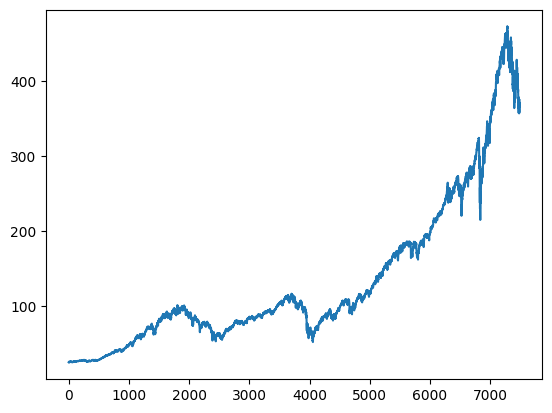

In [20]:
plt.plot(hist['Close'])

In [21]:
Start = date.today() - timedelta(620)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

'2022-10-25'

In [22]:
def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End)['Adj Close'])     
    return Asset

In [23]:
TESLA = closing_price('TSLA')
TESLA["asset"] = "TESLA"

TESLA["Adj Close"] = 1000 * TESLA["Adj Close"] / TESLA["Adj Close"].max()


[*********************100%***********************]  1 of 1 completed


In [24]:
def normalize(df):
    df["Adj Close"] = 1000 * df["Adj Close"] / df["Adj Close"].max()
    return df

def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End)['Adj Close'])     
    return Asset

def do_the_thing(str):
    df = closing_price(str)
    df["asset"] = str
    df = normalize(df)
    #df["Date"] = pd.to_datetime(df["Date"])
    return df

In [25]:
all = ALL86
all = all.append(do_the_thing("CL=F"), ignore_index=True)
all = all.append(do_the_thing("5ERUT"), ignore_index=True)
all = all.append(do_the_thing("GC=F"), ignore_index=True)
all = all.append(do_the_thing("WIG20"), ignore_index=True)



[*********************100%***********************]  1 of 1 completed


C:\Users\Mateusz\AppData\Local\Temp/ipykernel_3084/3481911550.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 5ERUT: No data found for this date range, symbol may be delisted


C:\Users\Mateusz\AppData\Local\Temp/ipykernel_3084/3481911550.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed


C:\Users\Mateusz\AppData\Local\Temp/ipykernel_3084/3481911550.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WIG20: No data found for this date range, symbol may be delisted


C:\Users\Mateusz\AppData\Local\Temp/ipykernel_3084/3481911550.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [26]:
import plotly.express as px

template = "plotly_dark"

fig = px.line(all, x='Date', y="Adj Close", color='asset', template=template)

fig.update_layout(
    title={
        'text': "ALL86",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [27]:
barz = pd.read_csv("barPlotdata.csv")

fig = px.bar(data_canada, x='year', y='pop')
fig.show()

NameError: name 'data_canada' is not defined